In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Cleaning

In [42]:
df_smol = pd.read_csv('aita778.csv')
df_big = pd.read_csv('aita7780.csv')

In [43]:
print(df_big.isnull().sum())

Unnamed: 0    0
id            0
flair         0
title         0
body          0
dtype: int64


In [44]:
#convert flair (outcome var) to numerical vals
le = LabelEncoder()
df_big['flair_num'] = le.fit_transform(df_big['flair'])

In [45]:
#split into test / train 

X = df_big['title']
y = df_big['flair_num']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=17)

In [46]:
df_big['title'][2]


'AITA for preferring that my uncle teach me to drive than my dad and refusing to tell my dad why?'

In [47]:
tfidf = TfidfVectorizer(max_features=5000)

In [48]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [49]:
dt_model = DecisionTreeClassifier(random_state=17, max_depth=10)
dt_model.fit(X_train_tfidf, y_train)

y_pred_dt = dt_model.predict(X_test_tfidf)

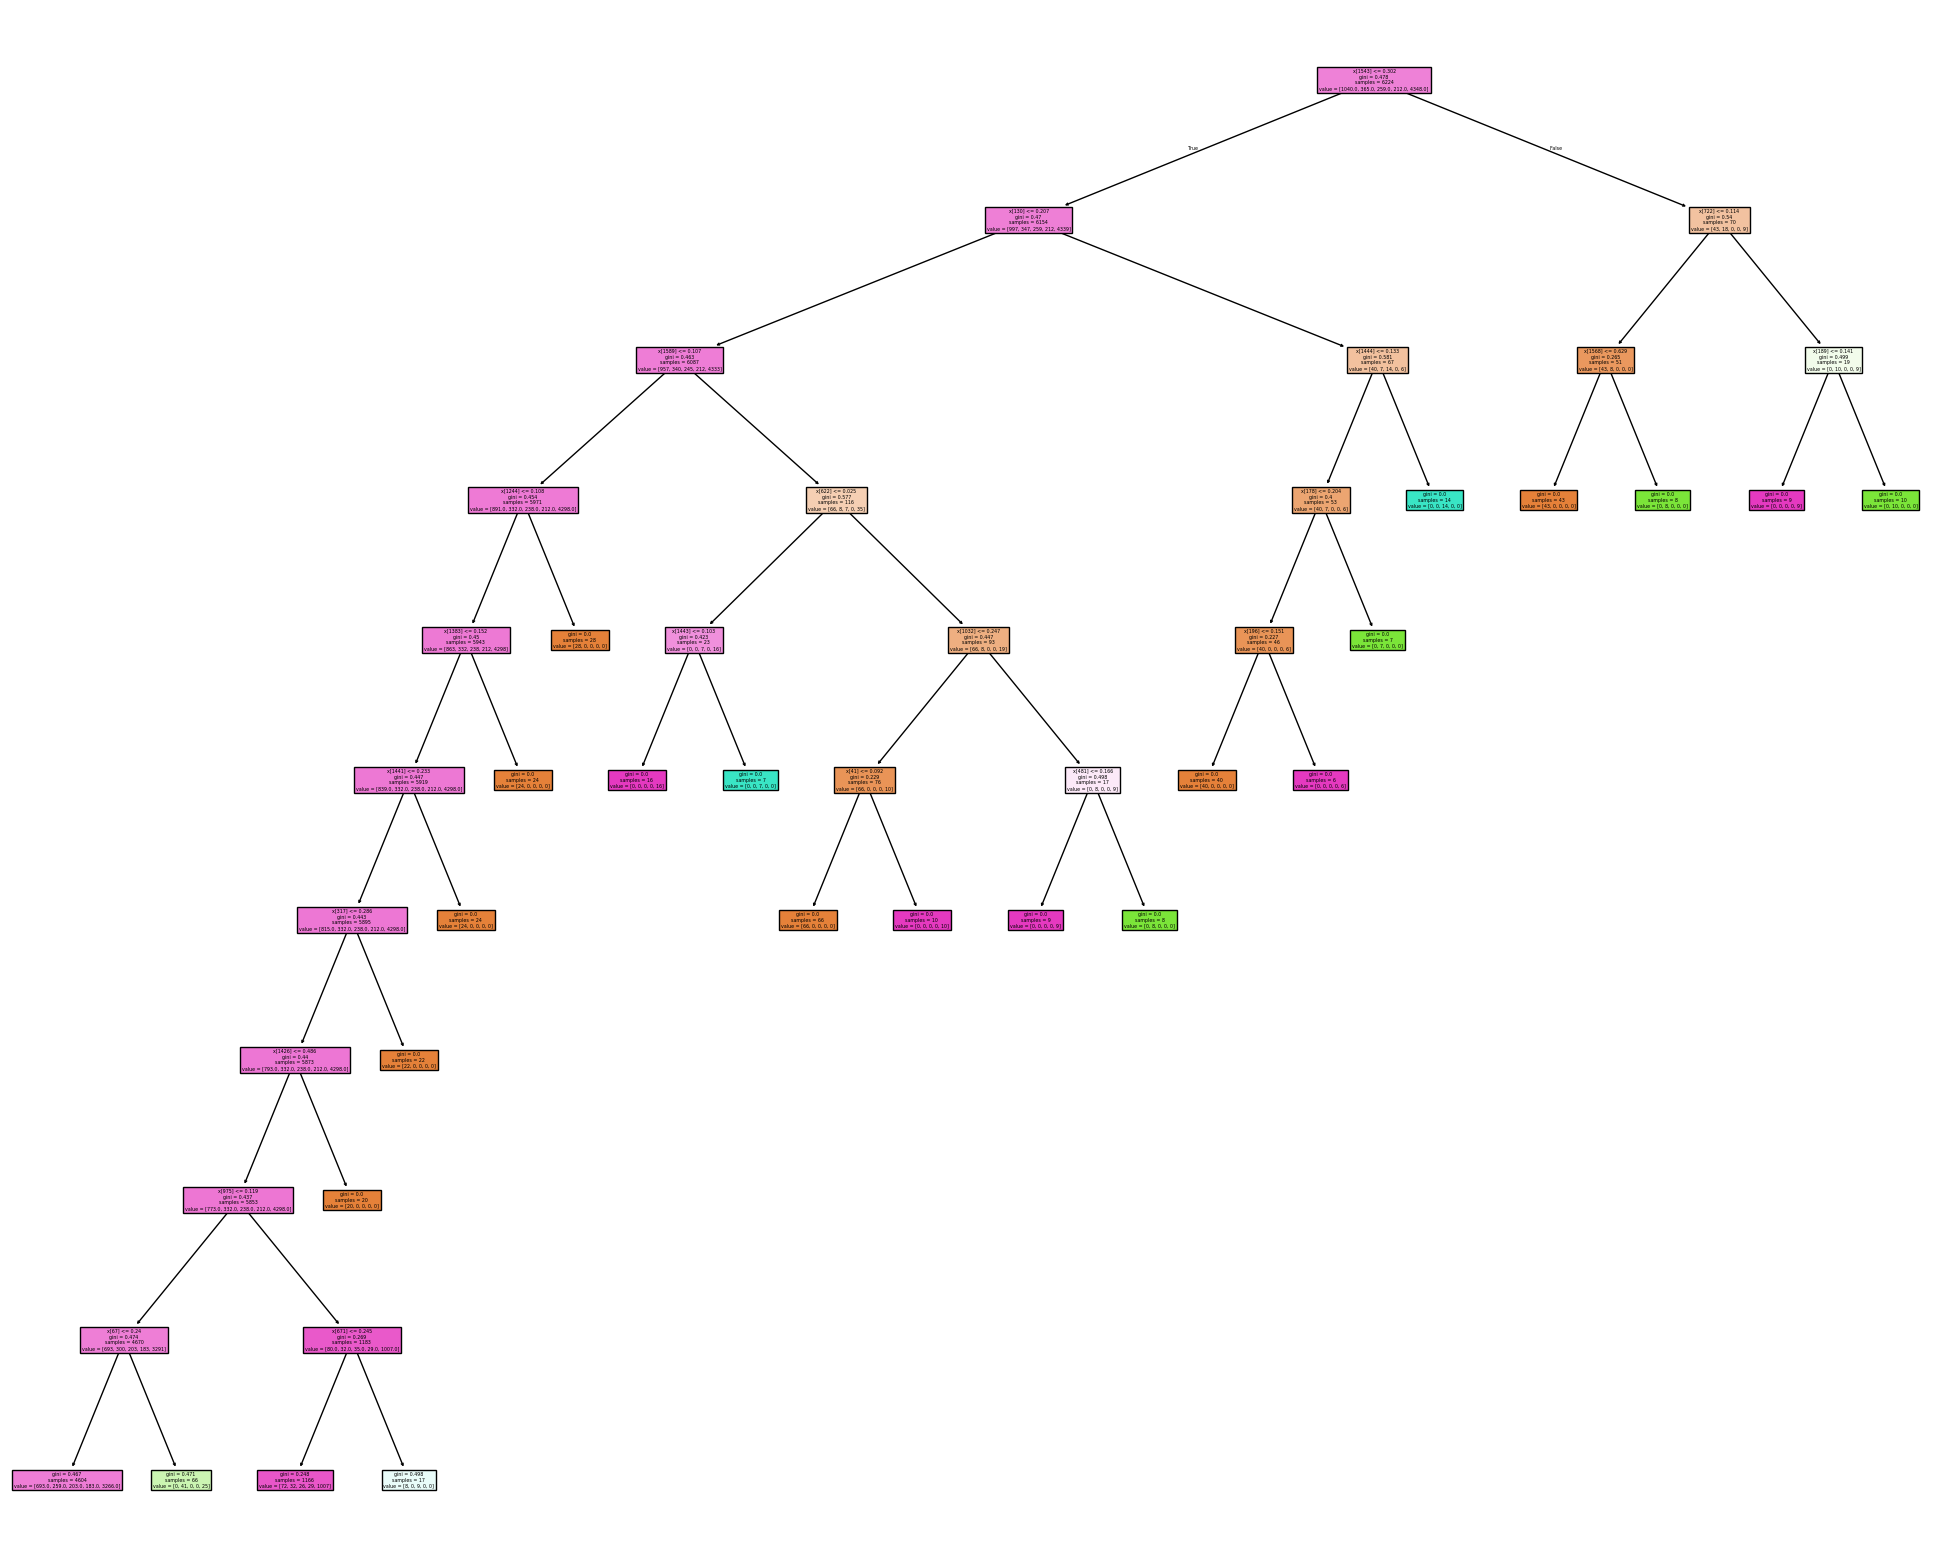

In [50]:
temp = dt_model.fit(X_train_tfidf, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(temp,
                #    feature_names=iris.feature_names,
                #    class_names=temp.target_names,
                   filled=True)

# tree.plot_tree(temp, max_depth=5)
fig.savefig("decistion_tree.png")

In [ ]:
print('Decision Tree Accuracy:',accuracy_score(y_test,y_pred_dt))

0.7172236503856041


In [52]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32       280
           1       0.76      0.17      0.28        95
           2       0.83      0.12      0.22        81
           3       0.00      0.00      0.00        58
           4       0.71      1.00      0.83      1042

    accuracy                           0.72      1556
   macro avg       0.66      0.30      0.33      1556
weighted avg       0.74      0.72      0.64      1556



/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [53]:
rf_model = RandomForestClassifier(random_state=17, max_depth=10, n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6735218508997429
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       280
           1       0.00      0.00      0.00        95
           2       1.00      0.04      0.07        81
           3       0.00      0.00      0.00        58
           4       0.67      1.00      0.80      1042

    accuracy                           0.67      1556
   macro avg       0.53      0.21      0.18      1556
weighted avg       0.68      0.67      0.55      1556



/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [58]:
base_tree = DecisionTreeClassifier(max_depth=5, random_state=17)
bagging_model = BaggingClassifier(estimator=base_tree, n_estimators=50, random_state=17)
bagging_model.fit(X_train_tfidf, y_train)

y_pred_bagging = bagging_model.predict(X_test_tfidf)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))


Bagging Accuracy: 0.7011568123393316
              precision    recall  f1-score   support

           0       1.00      0.12      0.21       280
           1       1.00      0.07      0.14        95
           2       1.00      0.11      0.20        81
           3       0.00      0.00      0.00        58
           4       0.69      1.00      0.82      1042

    accuracy                           0.70      1556
   macro avg       0.74      0.26      0.27      1556
weighted avg       0.76      0.70      0.60      1556



/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [57]:
gb_model = GradientBoostingClassifier(random_state=17)
gb_model.fit(X_train_tfidf, y_train)

y_pred_gb = gb_model.predict(X_test_tfidf)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.859254498714653
              precision    recall  f1-score   support

           0       1.00      0.31      0.48       280
           1       1.00      0.77      0.87        95
           2       1.00      0.94      0.97        81
           3       1.00      1.00      1.00        58
           4       0.83      1.00      0.90      1042

    accuracy                           0.86      1556
   macro avg       0.97      0.80      0.84      1556
weighted avg       0.88      0.86      0.83      1556



In [61]:
##Collect Merics for cCOmparison 
def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return{
        'Accuracy':accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test,y_pred,average='weighted'),
        'Recall':recall_score(y_test,y_pred,average='weighted'),
        'F1-Score': f1_score(y_test,y_pred, average='weighted')
    }

In [62]:
metrics = {
    'Decision Tree': eval_model(dt_model, X_test_tfidf,y_test),
    'Random Forest': eval_model(rf_model, X_test_tfidf, y_test),
    'Gradient Boosting': eval_model(gb_model, X_test_tfidf, y_test),
    'Bagging': eval_model(bagging_model, X_test_tfidf, y_test)
}

/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/asteria/miniconda3/envs/chatter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [63]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

           Decision Tree  Random Forest  Gradient Boosting   Bagging
Accuracy        0.717224       0.673522           0.859254  0.701157
Precision       0.742257       0.682193           0.883698  0.756093
Recall          0.717224       0.673522           0.859254  0.701157
F1-Score        0.638219       0.545953           0.832780  0.604238


In [64]:
metrics_df = metrics_df.T
print(metrics_df)

                   Accuracy  Precision    Recall  F1-Score
Decision Tree      0.717224   0.742257  0.717224  0.638219
Random Forest      0.673522   0.682193  0.673522  0.545953
Gradient Boosting  0.859254   0.883698  0.859254  0.832780
Bagging            0.701157   0.756093  0.701157  0.604238


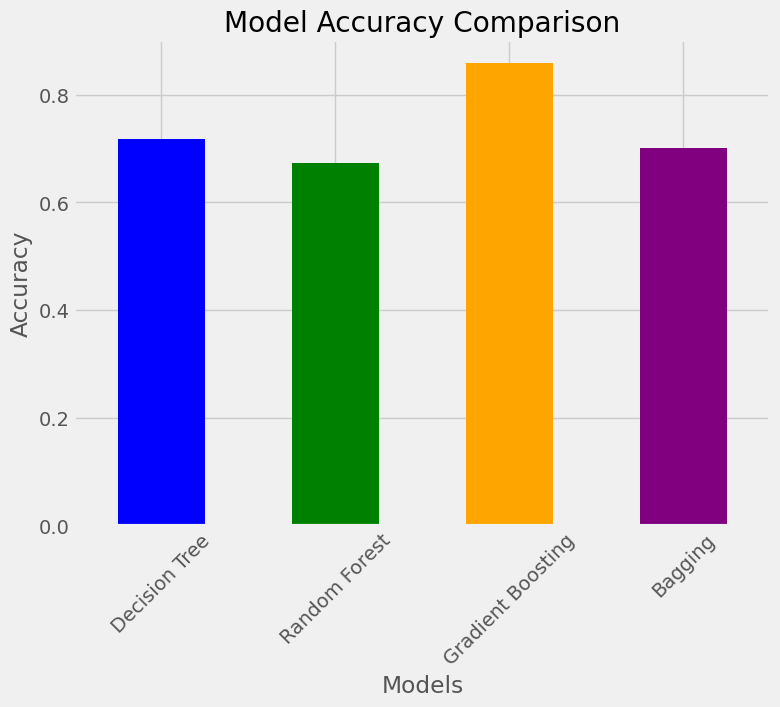

In [69]:
metrics_df['Accuracy'].plot(kind='bar', color=['blue', 'green', 'orange', 'purple'], figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

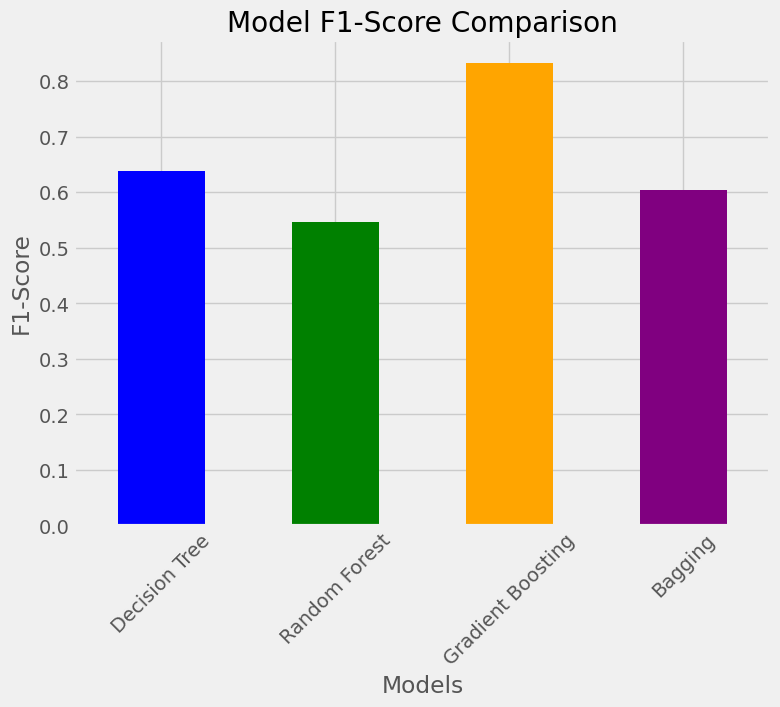

In [70]:
metrics_df['F1-Score'].plot(kind='bar', color=['blue', 'green', 'orange', 'purple'], figsize=(8, 6))
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()


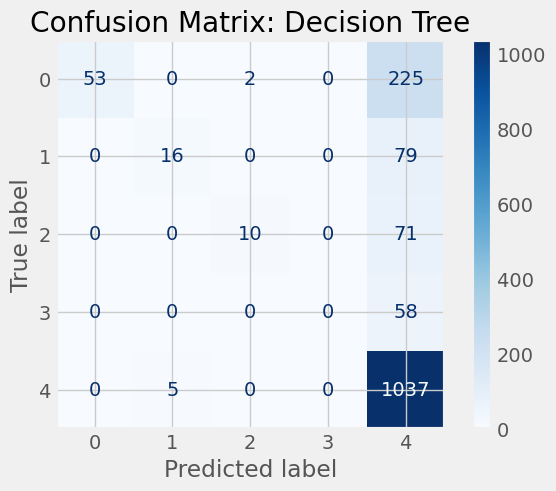

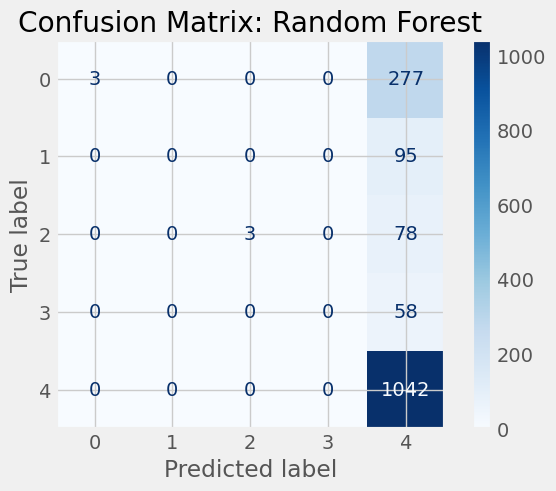

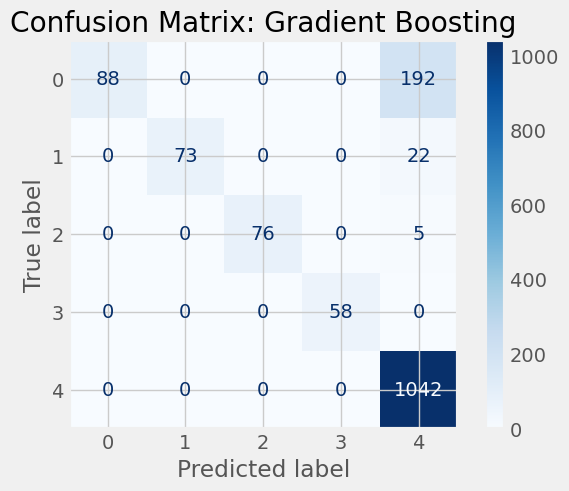

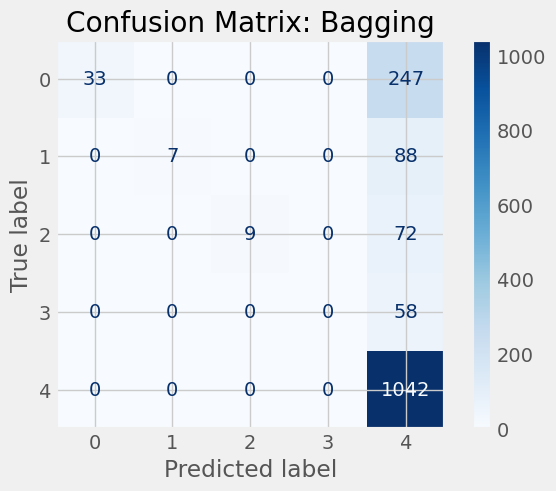

In [73]:
models = [("Decision Tree", dt_model), 
          ("Random Forest", rf_model), 
          ("Gradient Boosting", gb_model), 
          ("Bagging", bagging_model)]

for name, model in models:
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f"Confusion Matrix: {name}")
    plt.show()


In [74]:
cv_scores = {
    "Decision Tree": np.mean(cross_val_score(dt_model, X_train_tfidf, y_train, cv=5)),
    "Random Forest": np.mean(cross_val_score(rf_model, X_train_tfidf, y_train, cv=5)),
    "Gradient Boosting": np.mean(cross_val_score(gb_model, X_train_tfidf, y_train, cv=5)),
    "Bagging": np.mean(cross_val_score(bagging_model, X_train_tfidf, y_train, cv=5))
}

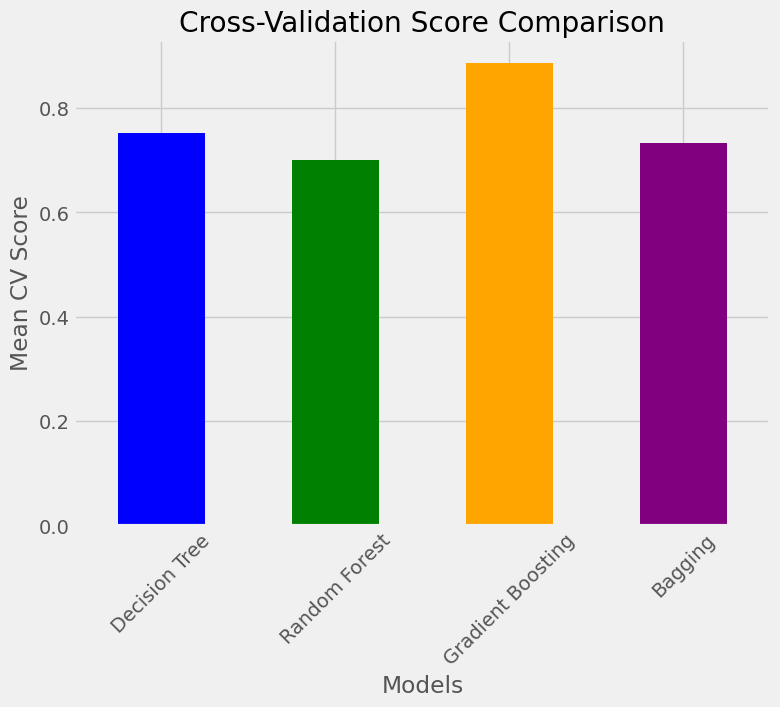

In [75]:
cv_scores_series = pd.Series(cv_scores)
cv_scores_series.plot(kind='bar', color=['blue', 'green', 'orange', 'purple'], figsize=(8, 6))
plt.title('Cross-Validation Score Comparison')
plt.ylabel('Mean CV Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()